In [1]:
import pandas as pd

In [2]:
import math

In [3]:
from scipy import stats as sc

In [4]:
from matplotlib import pyplot as plt

In [5]:
import numpy as np

In [6]:
from scipy import stats

In [7]:
csv = pd.read_csv('./ocean157ksafe.csv', ',')
print(len(csv.index))
# csv = pd.read_csv('../1605298557-experimento-personalidades.csv', ';')
# print(len(csv.index))

157101


In [8]:
renames = {
    '1_extraversion': "Extroversión",
    '1_agreeableness': "Agradabilidad",
    '1_conscientiousness': "Responsabilidad",
    '1_neuroticism': "Neuroticismo",
    '1_openness': "Apertura a la experiencia",
}

percentiles = {
    "min": 0.25,
    "med": 0.5,
    "max": 0.75
}

traits = list(renames.values())

In [9]:
csv = csv.rename(columns=renames)

In [10]:
step = 1
inf = 18
sup = 60
aggr = csv.groupby(pd.cut(csv["2_edad"], np.arange(inf - 1, sup + step, step)))

In [11]:
data = {}
for group, values in aggr:
    edad = str(group)[-3:-1]
    data[edad] = {
        "min": [],
        "med": [],
        "max": []
    }
    for p in percentiles.keys():
        q = values.quantile(percentiles[p])
        for trait in traits:
            data[edad][p].append(q[trait])

In [12]:
def getEstimate(own):
    min_diff = {"k": 0, "diff": 10000}
    for item in list(data.items()):
        diff = 0
        key, values = item
        for i, value in enumerate(own):
            trait_diff = ((value - values['med'][i]) / (values['max'][i] - values['min'][i])) ** 2
            diff += trait_diff
        if diff < min_diff["diff"]:
            min_diff = {"k": key, "diff": diff}
    return min_diff

In [13]:
getEstimate([21, 32, 27, 29, 45])

{'k': '18', 'diff': 0.7827538422776518}

In [14]:
edades = np.array([])
estimates = np.array([])
diffs = np.array([])
for i, row in csv.iterrows():
    own = np.array([])
    for col in traits:
        own = np.append(own, row[col])
    estimate = getEstimate(list(own))
    estimates = np.append(estimates, int(estimate["k"]))
    edades = np.append(edades, int(row['2_edad']))
    diffs = np.append(diffs, (abs(int(row['2_edad']) - int(estimate["k"]))))

In [15]:
sc.pearsonr(list(edades), list(estimates))

(0.16492277516555565, 0.0)

In [16]:
coef = np.polyfit(edades, estimates, 1)

In [17]:
poly1d_fn = np.poly1d(coef)

(18.0, 60.0)

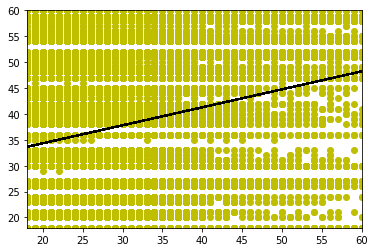

In [18]:
plt.plot(edades, estimates, 'yo', edades, poly1d_fn(edades), '--k')
plt.xlim(18,60)
plt.ylim(18,60)